# Bank Marketing Campaign : EDA

# Introduction

The bank provides financial services such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit.<br></br>
The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

### What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

# Problem Statement:

Target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

# Data Set Characteristics:

Number of Observations in both train and test data set : 49732 <br></br>
**Number of features :**
* 16 (numeric/categorical) independent features.
* 1 (target) dependent feature.

**features related to bank client data:**

1. Age: Client’s age.
2. Job: Client’s type of job.
3. Marital: Client’s marital status, divorced means divorced or widowed.
4. Education: Client’s education.
5. Default:  Does the customer have credit in default.
6. Balance : Client balance.
7. Housing: Client has a housing loan.
8. Loan: Client has a personal loan.

**features related to last contact of the current marketing campaign:**

9. Contact: Contact communication type (telephone or cellular).
10. Day : Last contact day of week.
11. Month: Last contact month of year.
12. Duration: Last contact duration in seconds. If duration is 0s, then we never contacted a client to sign up for a term deposit account.
13. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. Previous: number of contacts performed before this campaign and for this client (numeric)
16. Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)

***Output feature (target):***

17. y - has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

## Code for Analysing the Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Display all the columns in a dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
# import warning library
import warnings
warnings.filterwarnings("ignore")

In [383]:
# importing the train dataset
bank_train = pd.read_csv(r'train.csv',sep=';')
bank_train.head() # first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [384]:
bank_train.shape # shape of train data set

(45211, 17)

In [385]:
# importing the test dataset
bank_test = pd.read_csv(r'test.csv',sep=';')
bank_test.head() # first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [386]:
bank_test.shape # shape of test data set

(4521, 17)

### Merge both Train and Test data


In [387]:
# merging both train and test data sets 
bank = bank_train.append(bank_test,ignore_index=True)
bank.head() # first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [388]:
bank.tail() # last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [389]:
bank.shape # shape of dataframe after merging

(49732, 17)

In this DataFrame, there are 49732 Obervations and 17 features

## Exploration of data

In [390]:
bank.info() # information about all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [391]:
bank.describe() ## statistical summary of the dataframe

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [394]:
bank['day'].unique() # unique values in day feature

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [395]:
# Removing day feature
bank.drop('day',axis=1,inplace=True)

Day feature is not useful for our analysis. so I am dropping the column

### Checking missing values in the data set

In [396]:
bank.isna().sum()  # checking missing values in dataframe

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataframe.

In [397]:
bank.nunique() # no of unique items in each feature

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [398]:
bank['pdays'].value_counts() # counting the unique values in 'pdays' feature

-1      40659
 182      190
 92       159
 183      146
 91       137
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

pdays represents: This column represents the no of days passed by since the customer has been reached via bank for any of the other products (not term deposit). Here, the value ‘-1’ represents that the customer has never been reached for any product
and the count of -1 is very high.<br>
As this '-1' spoils my analysis I will replace this '-1' as nan so that this wont come in my analysis

In [399]:
bank['pdays'].replace({-1:np.nan},inplace=True) #replacing the '-1' with nan

In [400]:
bank['pdays'].value_counts()

182.0    190
92.0     159
183.0    146
91.0     137
181.0    127
        ... 
586.0      1
416.0      1
403.0      1
578.0      1
530.0      1
Name: pdays, Length: 558, dtype: int64

In [401]:
bank['pdays'].describe()

count    9073.000000
mean      224.603549
std       115.505707
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Dealing with Outliers

In [402]:
bank.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,9073.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,224.603549,0.576892
std,10.615008,3041.608766,257.743149,3.099075,115.505707,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,194.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,327.000000,0.000000
90%,56.000000,3611.900000,551.000000,5.000000,363.000000,2.000000
95%,59.000000,5798.450000,753.000000,8.000000,370.000000,3.000000
99%,71.000000,13295.450000,1268.690000,16.000000,531.280000,8.000000


In [403]:
numerical_features = [feature for feature in bank.columns if bank[feature].dtype != 'O'] # finding numerical features
numerical_features

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [404]:
sns.set_style('darkgrid') # setting the figure style
sns.set(rc={'figure.figsize':(10,8)}) # setting the figure size

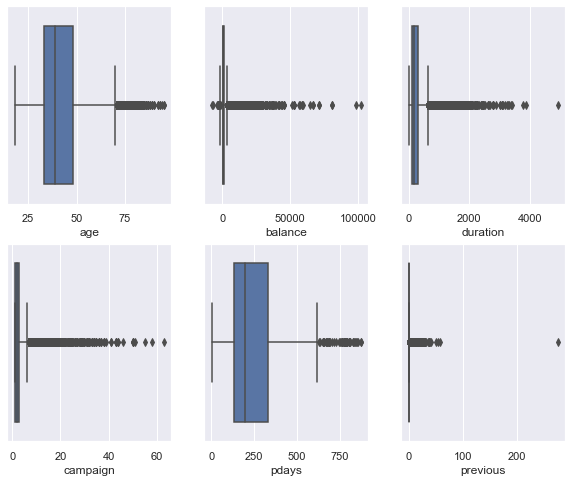

In [407]:
# box plot
_,ax = plt.subplots(2,3)  #plotting 3 * 3 figure
for i in range(len(numerical_features)):  # iterating through numerical variables
    sns.boxplot(x=bank[numerical_features[i]],ax=ax[i//3][i%3]) # plotting boxplot for each numerical feature

In [408]:
#calculating 25% and 75% of the age feature
q1_age = bank['age'].quantile(0.25)
q3_age = bank['age'].quantile(0.75)
q1_age,q3_age  #printing q1 and q2

(33.0, 48.0)

In [409]:
# Calculating IQR
IQR = q3_age-q1_age
IQR

15.0

In [410]:
lower_limit_age = q1_age - 1.5*IQR # calculating the lower limit
upper_limit_age = q3_age + 1.5*IQR # calculating the upper limit
lower_limit_age,upper_limit_age

(10.5, 70.5)

In [411]:
# Removal of outliers in age feature
bank = bank[(bank['age']>lower_limit_age) & (bank['age']<upper_limit_age)]

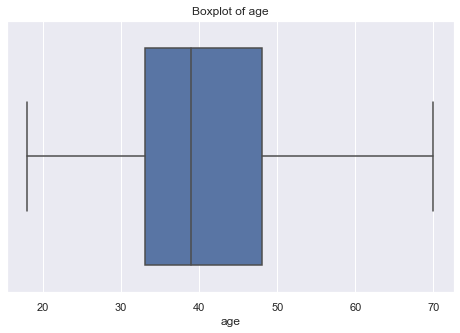

In [412]:
plt.figure(figsize = (8,5)) # figure size
sns.boxplot(bank['age']).set_title('Boxplot of age') #boxplot
plt.show()

As we can see, The outliers are removed from the age feature

<AxesSubplot:xlabel='duration'>

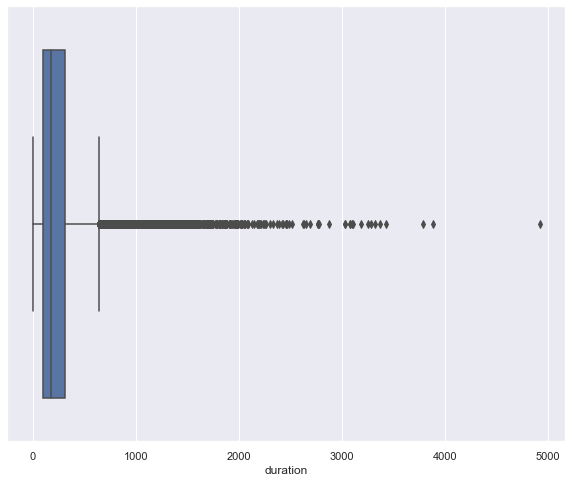

In [413]:
# boxplot for duration feature
sns.boxplot(bank['duration']) 

There are many outliers in 'duration' feature so we can replace the outliers

In [414]:
#calculating 25% and 75% of the duration feature
q1_duration = bank['duration'].quantile(0.25)
q3_duration = bank['duration'].quantile(0.75)
q1_duration,q3_duration  #printing q1 and q2

(103.0, 318.0)

In [415]:
# Calculating IQR
IQR = q3_duration-q1_duration
IQR

215.0

In [416]:
lower_limit_duration = q1_duration - 1.5*IQR # calculating the lower limit
upper_limit_duration = q3_duration + 1.5*IQR # calculating the upper limit
lower_limit_duration,upper_limit_duration

(-219.5, 640.5)

**Replacing the ouliers with Meidan in duration feature**

As the mean value is highly influenced by the outliers, So I will replace the outliers with the median value.

In [448]:
bank_2 = bank.copy() # copying the dataframe

In [449]:
median_duration = bank_2['duration'].median() # median for duration feature
median_duration

180.0

In [450]:
for i in bank_2['duration']: # iterating through duration feature
    if(i<lower_limit_duration or i>upper_limit_duration):  # checking the limit
        bank_2['duration'].replace(i,median_duration,inplace=True) # replacing the outlier with the median

<AxesSubplot:xlabel='duration'>

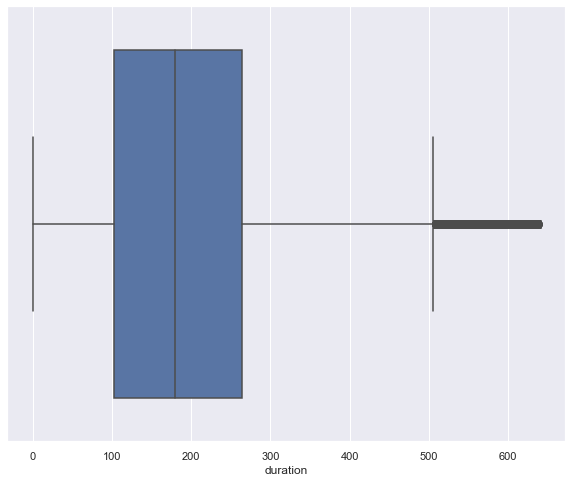

In [451]:
sns.boxplot(bank_2['duration']) # boxplot 

In [454]:
bank_2['duration'][bank_2['duration']>1300].count() # counting the values which are above 99 percentile value

0

As there are no values that are greater then the 99 percentile value, I can consider as there are no outliers

## Univariate analysis

### Numerical Features

In [455]:
numerical_features #printing numerical features

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

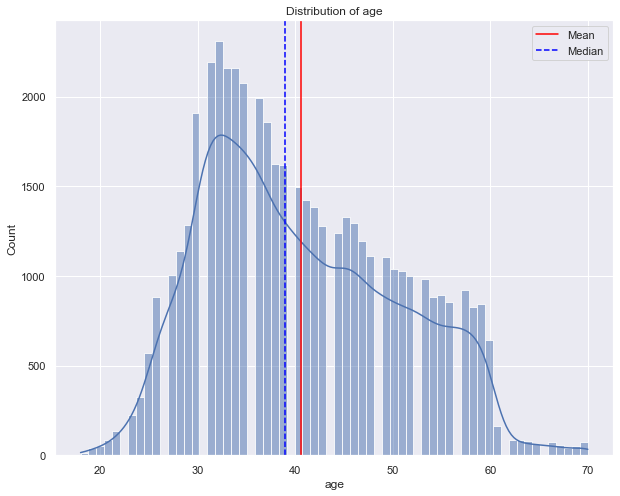

In [456]:
# Distribution of age feature
sns.histplot(bank_2['age'], kde=True).set_title('Distribution of age') # histplot
plt.axvline(x=bank_2['age'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['age'].median(), c='blue',ls='--',label='Median')  # Plotting median value 
plt.legend()
plt.show()

In [457]:
bank_2['age'].skew() # checking skewness

0.4170539320079013

Age feature is Normally distributed.

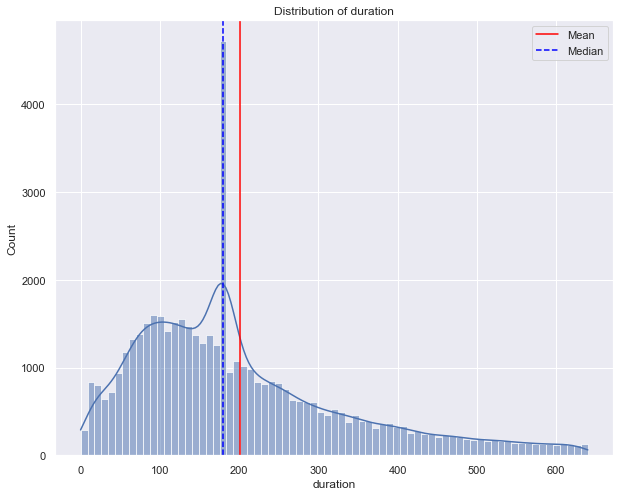

In [458]:
# Distribution of duration feature
sns.histplot(bank_2['duration'], kde=True).set_title('Distribution of duration') # histplot
plt.axvline(x=bank_2['duration'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['duration'].median(), c='blue',ls='--',label='Median')  # Plotting median value 
plt.legend()
plt.show()

In [459]:
bank_2['duration'].skew() # checking skewness

1.0867355467612636

'Duration' feature is Skewed, So I can transform the data

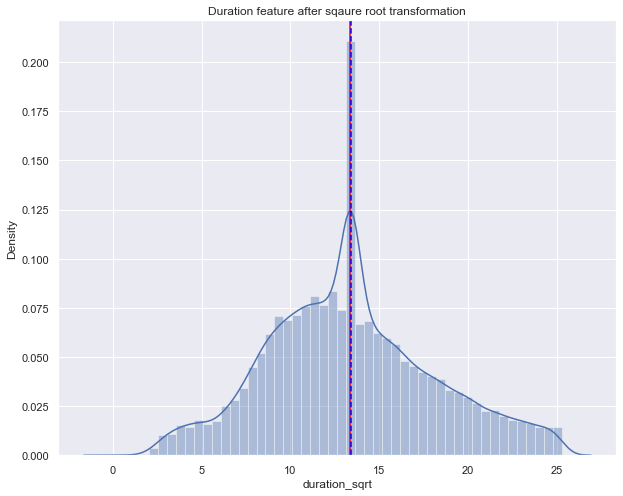

In [460]:
# Transforming the 'duration feature'
bank_2['duration_sqrt'] = np.sqrt(bank_2['duration'])  # sqaure root transformation
sns.distplot(bank_2['duration_sqrt']).set_title('Duration feature after sqaure root transformation')  # dist plot
plt.axvline(x=bank_2['duration_sqrt'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['duration_sqrt'].median(), c='blue',ls='--',label='Median')# Plotting median value 
plt.show()

As I different transmations, In that square root transformation giving the best result.

In [461]:
bank_2['duration_sqrt'].skew() # checking skewness

0.2602121483780027

After tranforming the 'duration' feature the data is Normally distributed

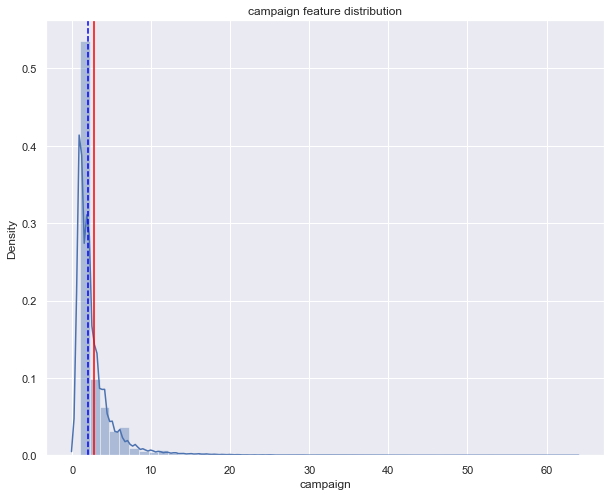

In [462]:
# Distribution of campaign feature
sns.distplot(bank_2['campaign']).set_title('campaign feature distribution')    # dist plot
plt.axvline(x=bank_2['campaign'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['campaign'].median(), c='blue',ls='--',label='Median')# Plotting median value 
plt.show()

In [463]:
# Logarithm Transformation
bank_2['campaign_log'] = np.log(bank_2['campaign'])

As I tried different transmations, In that Logarithm transformation giving the best result.

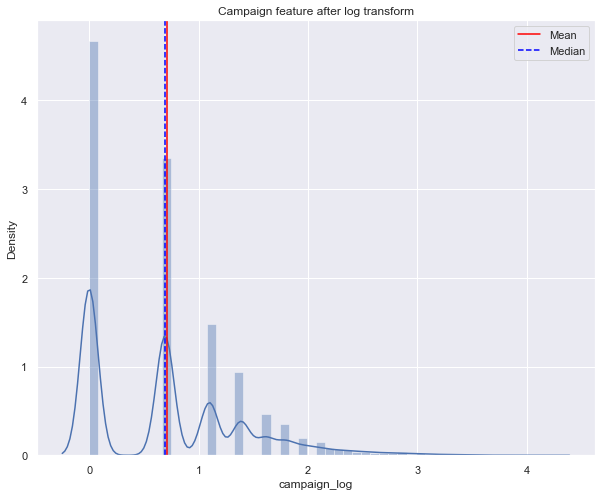

In [464]:
sns.distplot(bank_2['campaign_log']).set_title('Campaign feature after log transform')  # dist plot
plt.axvline(x=bank_2['campaign_log'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['campaign_log'].median(), c='blue',ls='--',label='Median')# Plotting median value 
plt.legend()
plt.show()

In [465]:
bank_2['campaign_log'].skew() # checking skewness

0.8781406946837013

After the log transformation the Campaign feature is Moderatly skewed. So, we are good to go with this feature.

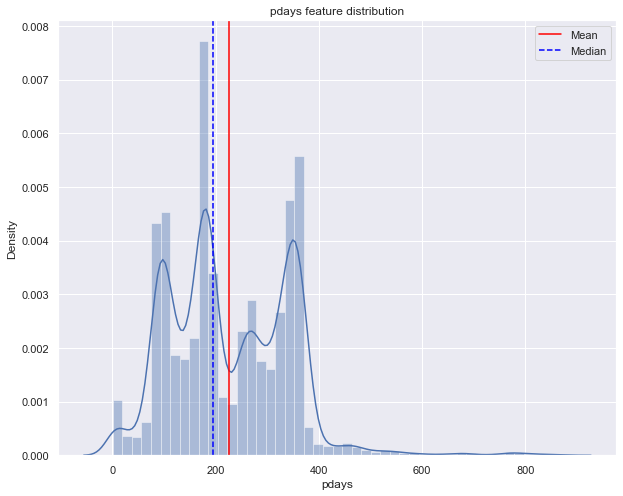

In [466]:
# Distribution of 'pdays' feature
sns.distplot(bank_2['pdays']).set_title('pdays feature distribution') # dist plot
plt.axvline(x=bank_2['pdays'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['pdays'].median(), c='blue',ls='--',label='Median')# Plotting median value 
plt.legend()
plt.show()

In [467]:
bank['pdays'].skew()  # checking skewness

0.6983716425795379

'pdays' feature is moderatly skewed

In [468]:
# Square Root Transformation
bank_2['pdays_sqrt'] = np.sqrt(bank_2['pdays'])

Square Root Transformation giving me the best results for pdays feature.

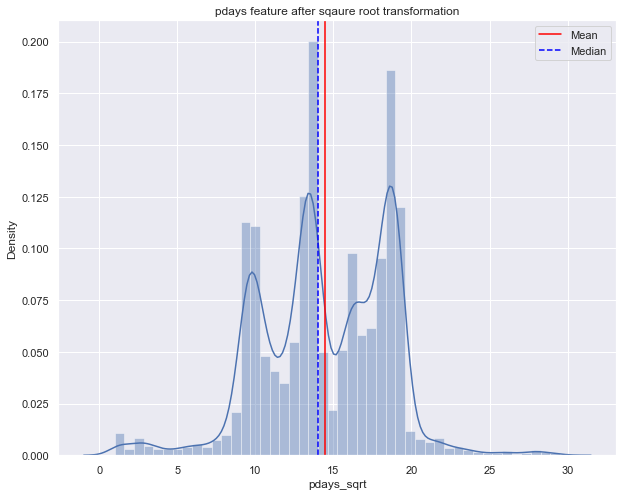

In [469]:
sns.distplot(bank_2['pdays_sqrt']).set_title('pdays feature after sqaure root transformation')  # dist plot
plt.axvline(x=bank_2['pdays_sqrt'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=bank_2['pdays_sqrt'].median(), c='blue',ls='--',label='Median')# Plotting median value 
plt.legend()
plt.show()

In [470]:
bank_2['pdays_sqrt'].skew()  # checking skewness

-0.30553116402836955

Now, the 'pdays' feature is Normally distributed

In [471]:
bank_2.columns  

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'duration_sqrt', 'campaign_log', 'pdays_sqrt'],
      dtype='object')

In [487]:
# Now I can remove original features of transformed features
bank_3 = bank_2.drop(['duration','campaign','pdays'],axis=1)  # dropping and storing into new data frame
bank_3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'previous', 'poutcome', 'y',
       'duration_sqrt', 'campaign_log', 'pdays_sqrt'],
      dtype='object')

### Categorical features

In [488]:
categorical_features = [feature for feature in bank_3.columns if bank_3[feature].dtype == 'O'] # finding the categorical features
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

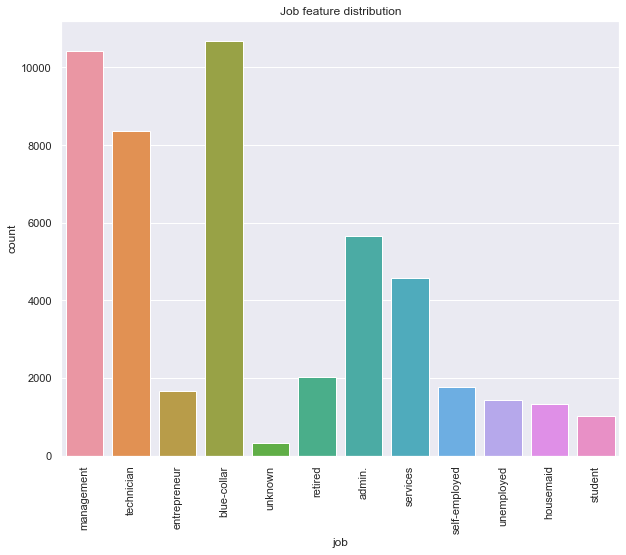

In [489]:
# count plot
sns.countplot(bank_3['job']).set_title('Job feature distribution')
plt.xticks(rotation=90) # rotating the xticks vertically
plt.show()

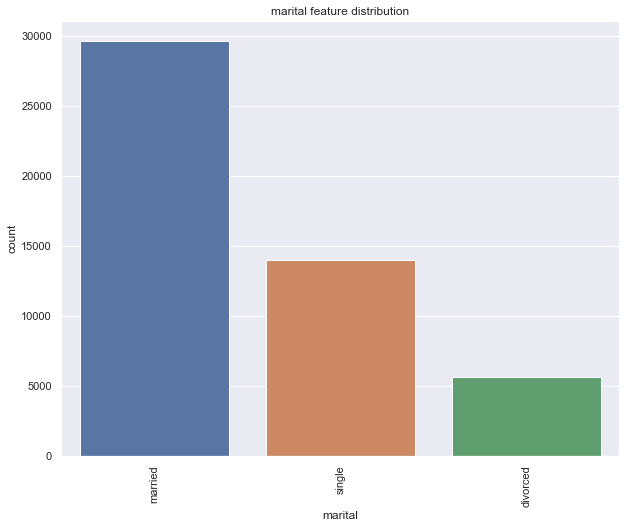

In [490]:
# count plot
sns.countplot(bank_3['marital']).set_title('marital feature distribution')
plt.xticks(rotation=90) # rotating the xticks vertically
plt.show()

<AxesSubplot:>

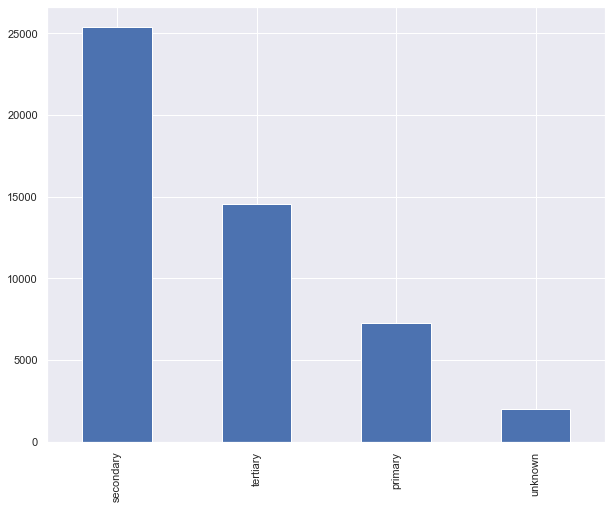

In [491]:
bank_3['education'].value_counts().plot.bar()  # bar plot for education

<AxesSubplot:xlabel='default', ylabel='count'>

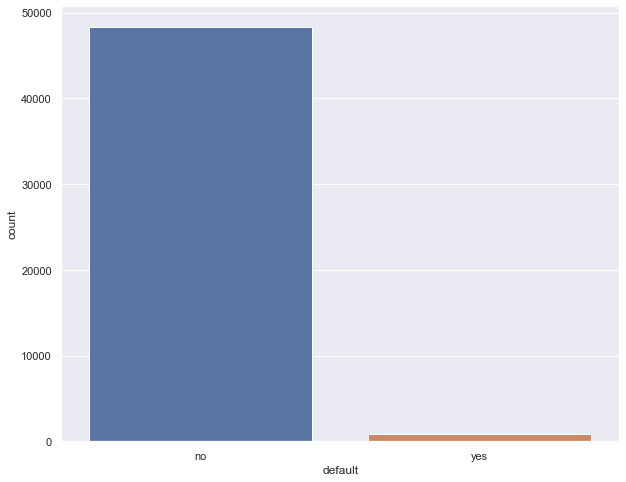

In [492]:
sns.countplot(bank_3['default']) # countplot

By the above figure, Most of the customers doesn't have credit in default.

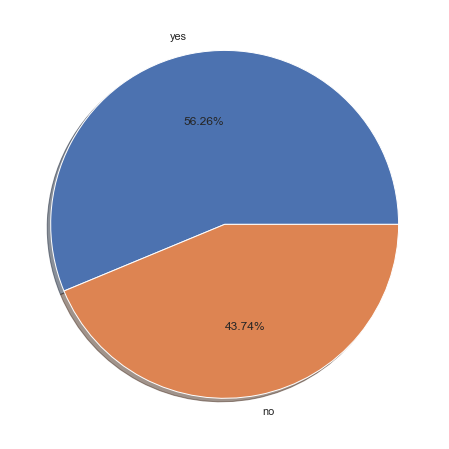

In [493]:
plt.pie(bank_3['housing'].value_counts().values,labels=bank_3['housing'].value_counts().index,autopct = '%1.2f%%',shadow=True)
plt.show()

56% of customers having the housing loan.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

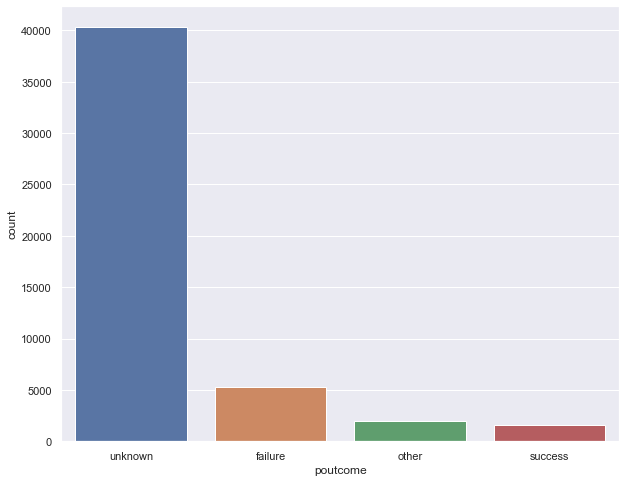

In [494]:
sns.countplot(bank_3['poutcome'])  # countplot for poutcome feature

<AxesSubplot:xlabel='month', ylabel='count'>

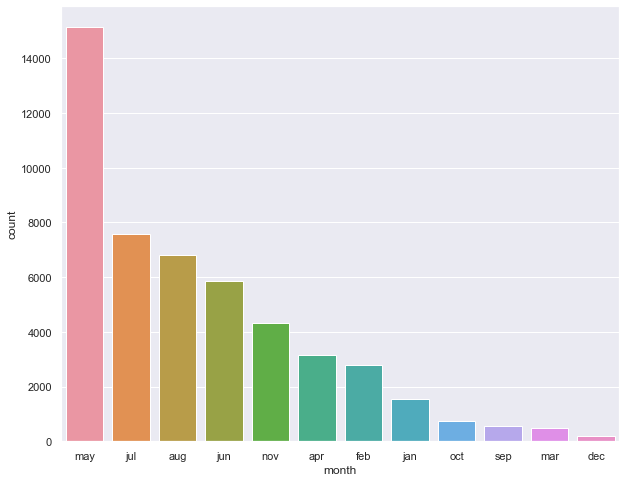

In [495]:
sns.countplot(bank_3['month'],order=bank_3['month'].value_counts().index)

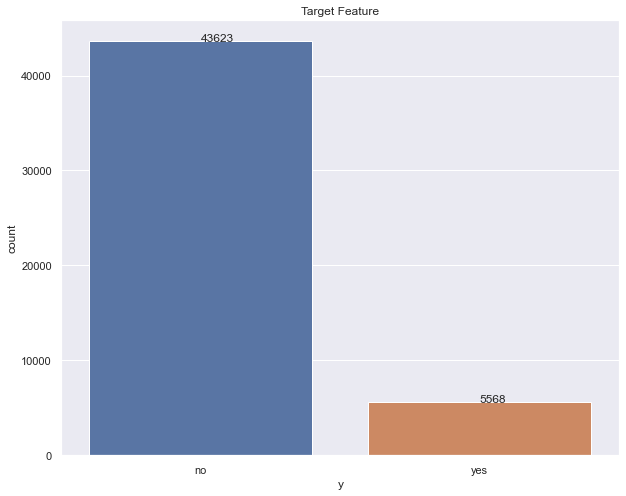

In [496]:
# Target variable
sns.countplot(bank_3['y']).set_title('Target Feature')  # count plot for y feature
for i,df in enumerate(bank_3['y'].value_counts()):
    plt.text(i,df,str(df))  # ploting the counts of categiers

## Bivariate analysis

In [500]:
bank_3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'previous', 'poutcome', 'y',
       'duration_sqrt', 'campaign_log', 'pdays_sqrt'],
      dtype='object')

In [501]:
# creating dummy values 'no' as 0 and 'yes' as 1
bank_3['y_dummy'] = bank_3['y'].replace({'no':0,'yes':1})

In [541]:
bank_3.groupby('job')['y_dummy'].mean()*100 # Percentage in each category response is yes

job
admin.           12.185618
blue-collar       7.280052
entrepreneur      8.287961
housemaid         8.770615
management       13.704024
retired          17.337308
self-employed    11.560364
services          8.903960
student          28.180039
technician       11.015429
unemployed       15.024458
unknown          12.264151
Name: y_dummy, dtype: float64

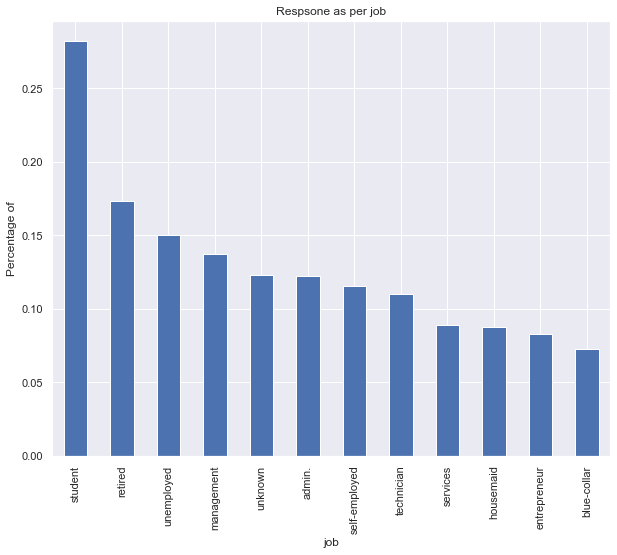

In [556]:
bank_3.groupby('job')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per job
plt.title('Respsone as per job') # title of figure
plt.ylabel('Percentage of')  
plt.show()

**Obervation :**<br>
* Student categery has the highest percentage of who responsed 'yes'
* Blue-collar categery has the lowest percentage of who responsed 'yes'

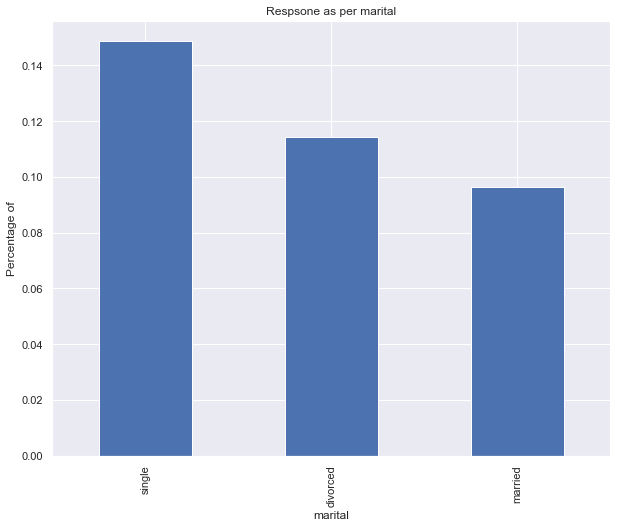

In [558]:
bank_3.groupby('marital')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per marital
plt.title('Respsone as per marital') # title of figure
plt.ylabel('Percentage of')  
plt.show()

Single categery has the highest percentage of who responsed 'yes'

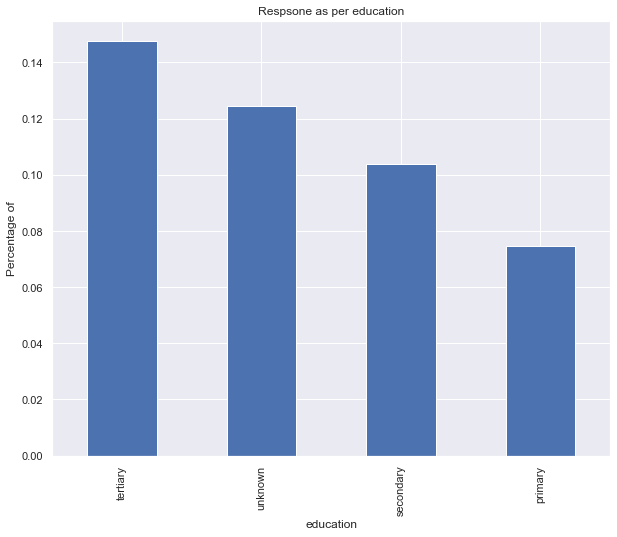

In [560]:
bank_3.groupby('education')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per education
plt.title('Respsone as per education') # title of figure
plt.ylabel('Percentage of')  
plt.show()

Tertiary categery has the highest percentage of who responsed 'yes'

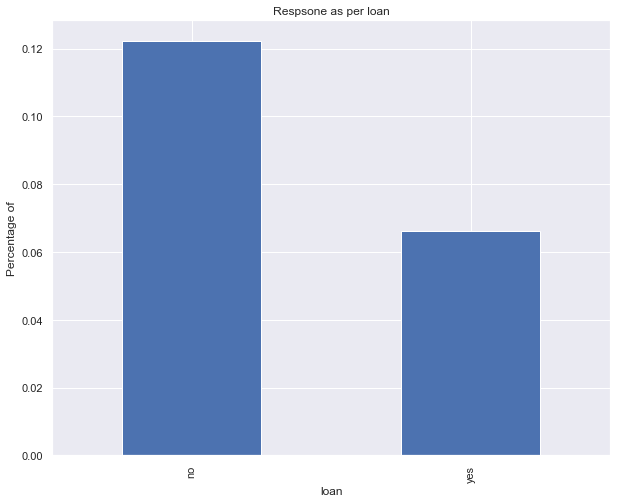

In [561]:
bank_3.groupby('loan')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per loan
plt.title('Respsone as per loan') # title of figure
plt.ylabel('Percentage of')
plt.show()

**Observation :**<br>
Clients who has not taken the personal loan are mostly said 'Yes' to term deposit

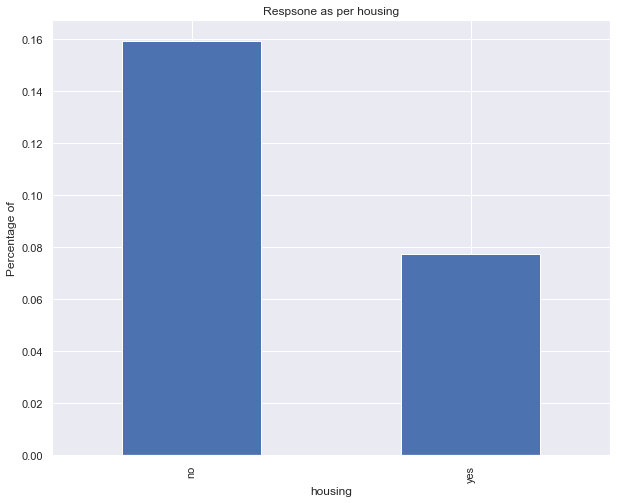

In [562]:
bank_3.groupby('housing')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per housing
plt.title('Respsone as per housing') # title of figure
plt.ylabel('Percentage of')
plt.show()

**Observation :**<br>
Clients who has not taken the housing loan are mostly said 'Yes' to term deposit.

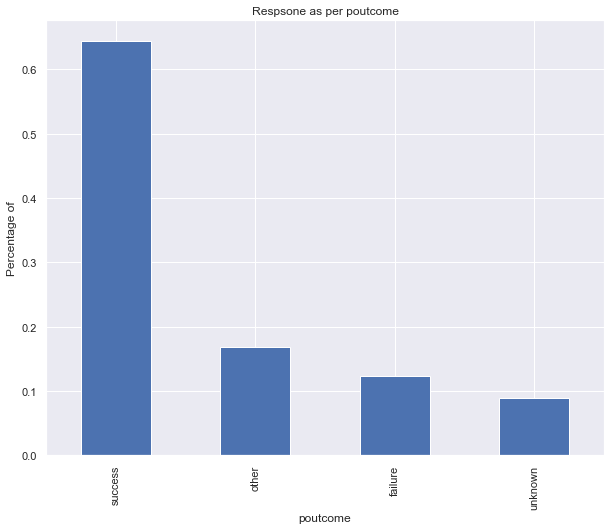

In [566]:
bank_3.groupby('poutcome')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot for response as per poutcome
plt.title('Respsone as per poutcome') # title of figure
plt.ylabel('Percentage of')
plt.show()

**Observation :**
* The clients who are responded positivily in previous marketing campaign are also responded positivily in ongoing marketing campaign

Text(0.5, 1.0, 'Response as per ages')

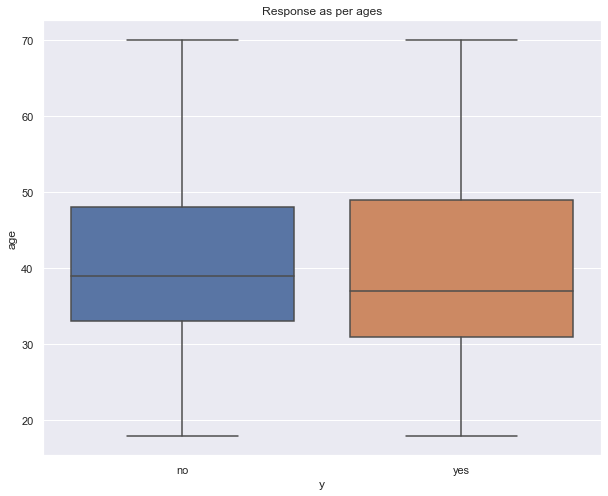

In [580]:
sns.boxplot(bank_3['y'],bank_3['age']).set_title('Response as per ages')  # boxplot

In [569]:
bank_3['age'].max() # finding maximum item in age

70

In [577]:
# Creating new columns and dividing the age into age groups
bank_3['Age_groups'] = pd.cut(bank_3['age'], bins=[0,20,40,60,80], labels=['0-20','20-40','40-60','60-80'])

In [581]:
bank_3.head(10) # first 10 observations

,age,job,marital,education,default,balance,housing,loan,contact,month,previous,poutcome,y,duration_sqrt,campaign_log,pdays_sqrt,y_dummy,Age_groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,0,unknown,no,16.155494,0.0,NaN,0,40-60
1,44,technician,single,secondary,no,29,yes,no,unknown,may,0,unknown,no,12.288206,0.0,NaN,0,40-60
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,0,unknown,no,8.717798,0.0,NaN,0,20-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,0,unknown,no,9.591663,0.0,NaN,0,40-60
4,33,unknown,single,unknown,no,1,no,no,unknown,may,0,unknown,no,14.071247,0.0,NaN,0,20-40
5,35,management,married,tertiary,no,231,yes,no,unknown,may,0,unknown,no,11.789826,0.0,NaN,0,20-40
6,28,management,single,tertiary,no,447,yes,yes,unknown,may,0,unknown,no,14.730920,0.0,NaN,0,20-40
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,may,0,unknown,no,19.493589,0.0,NaN,0,40-60
8,58,retired,married,primary,no,121,yes,no,unknown,may,0,unknown,no,7.071068,0.0,NaN,0,40-60
9,43,technician,single,secondary,no,593,yes,no,unknown,may,0,unknown,no,7.416198,0.0,NaN,0,40-60


In [585]:
bank_3.groupby('Age_groups')['y_dummy'].mean()*100  # Finding percentage of age groups as per y(response)

Age_groups
0-20     34.615385
20-40    11.791459
40-60     9.568366
60-80    39.793282
Name: y_dummy, dtype: float64

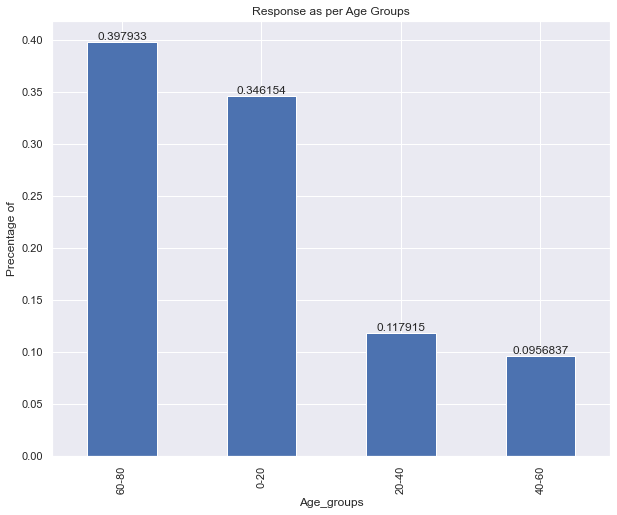

In [602]:
ax = bank_3.groupby('Age_groups')['y_dummy'].mean().sort_values(ascending=False).plot.bar() # bar plot
plt.title('Response as per Age Groups') # title of figure
plt.ylabel('Precentage of') # y label
for i in ax.containers:
    ax.bar_label(i,)  # printing specfic values on bar chart

**Observation :**
* The age between 60-80, Most of them are responded positivily towords the ongoing campaign
* The age between 40-60, less of them are  responded positivily towords the ongoing campaign

### Multivariate analysis

In [603]:
bank_3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'previous', 'poutcome', 'y',
       'duration_sqrt', 'campaign_log', 'pdays_sqrt', 'y_dummy', 'Age_groups'],
      dtype='object')

Text(0.5, 1.0, 'Previous outcome Vs Present outcome as per Marital Status')

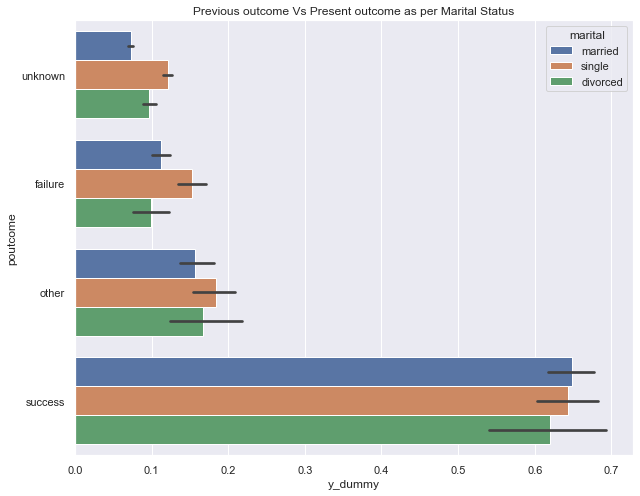

In [624]:
## bar plotting Previous outcome Vs Present outcome as per Marital Status
sns.barplot(x='y_dummy',y='poutcome',hue='marital',data=bank_3).set_title('Previous outcome Vs Present outcome as per Marital Status')

**Observaion :**
* Most of the clients who responded 'Yes' for previous campaign are also responded positivitly for present campaign, Most of them are married

In [620]:
bank_3_corr = bank_3.corr(method='spearman') # findinf the relation between the numerical varibles

<AxesSubplot:>

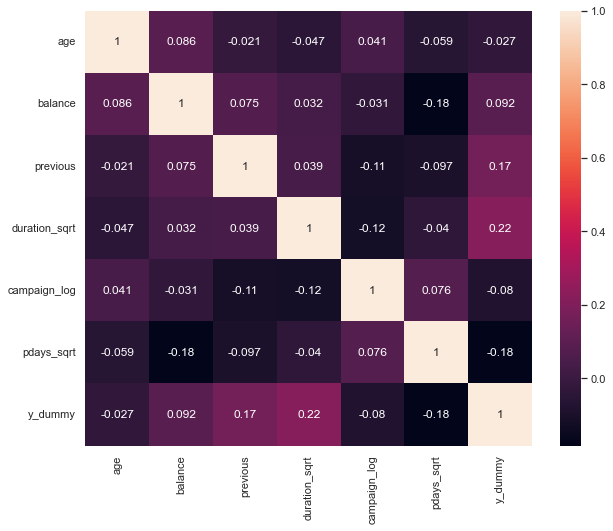

In [621]:
sns.heatmap(bank_3_corr,annot=True) # heatmap for correlation

**Note :**<br>
There is no any correlation between the numerical  variables.

In [632]:
categorical_features # printing categorical features

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

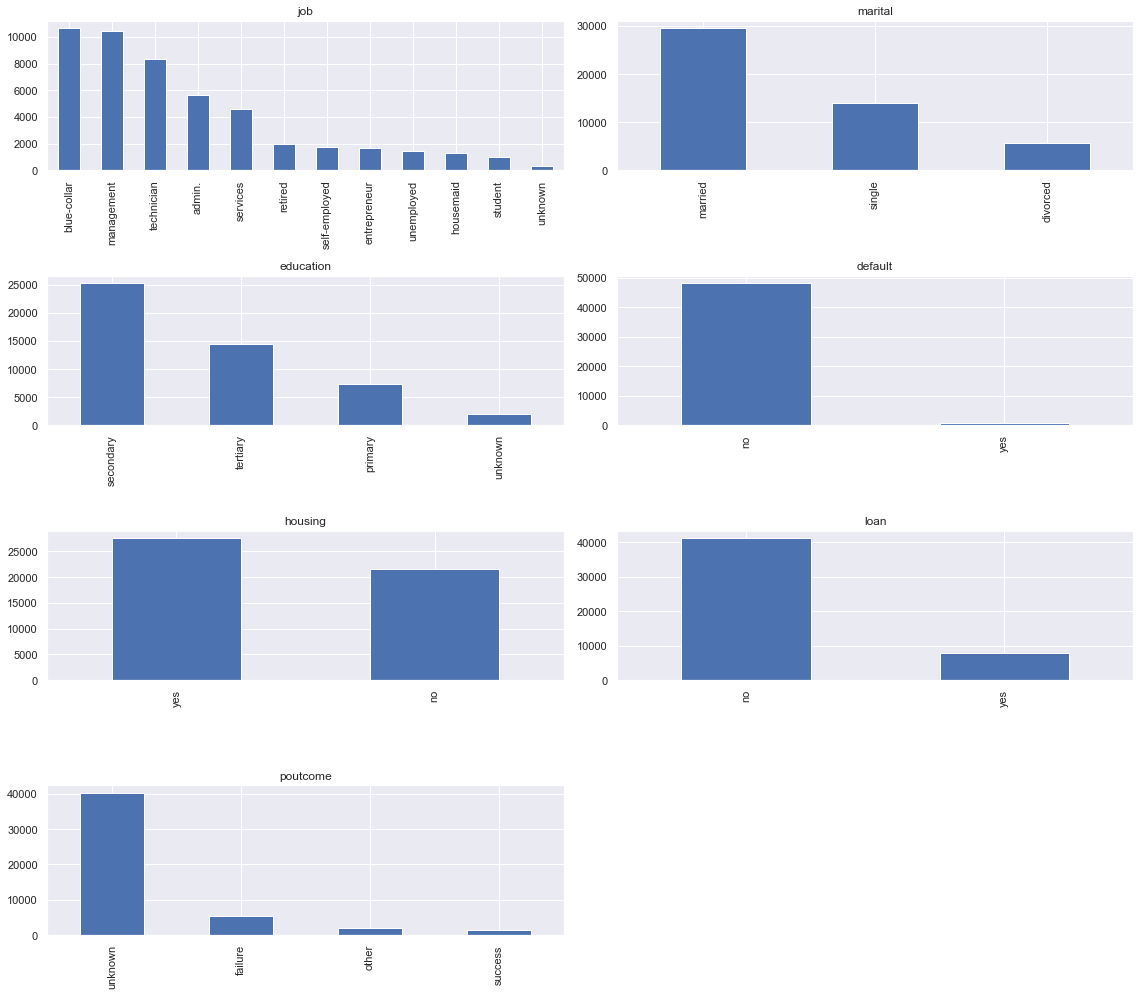

In [637]:
n = len(categorical_features)   # length of categorical_features
i=1
plt.figure(figsize=(16,14))  # fig size
for feature in bank_3[categorical_features]:  # iterating through the categorical_features
    plt.subplot(round(n/2),round(n/3), i)    # ploting subplots
    bank_3[feature].value_counts().plot.bar()  # bar plot
    plt.xticks(rotation=90)
    plt.title(feature)
    i+=1         # moving to next plot
    plt.tight_layout();

**Observations :**<br>
*Most Common :*<br>
* Job : clients having 'blue-collar' are the highest.
* Marital : Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan
* Poutcome : did not participate in previous campaigns are high<
    

### Let's see how categories influence the y(response) variable

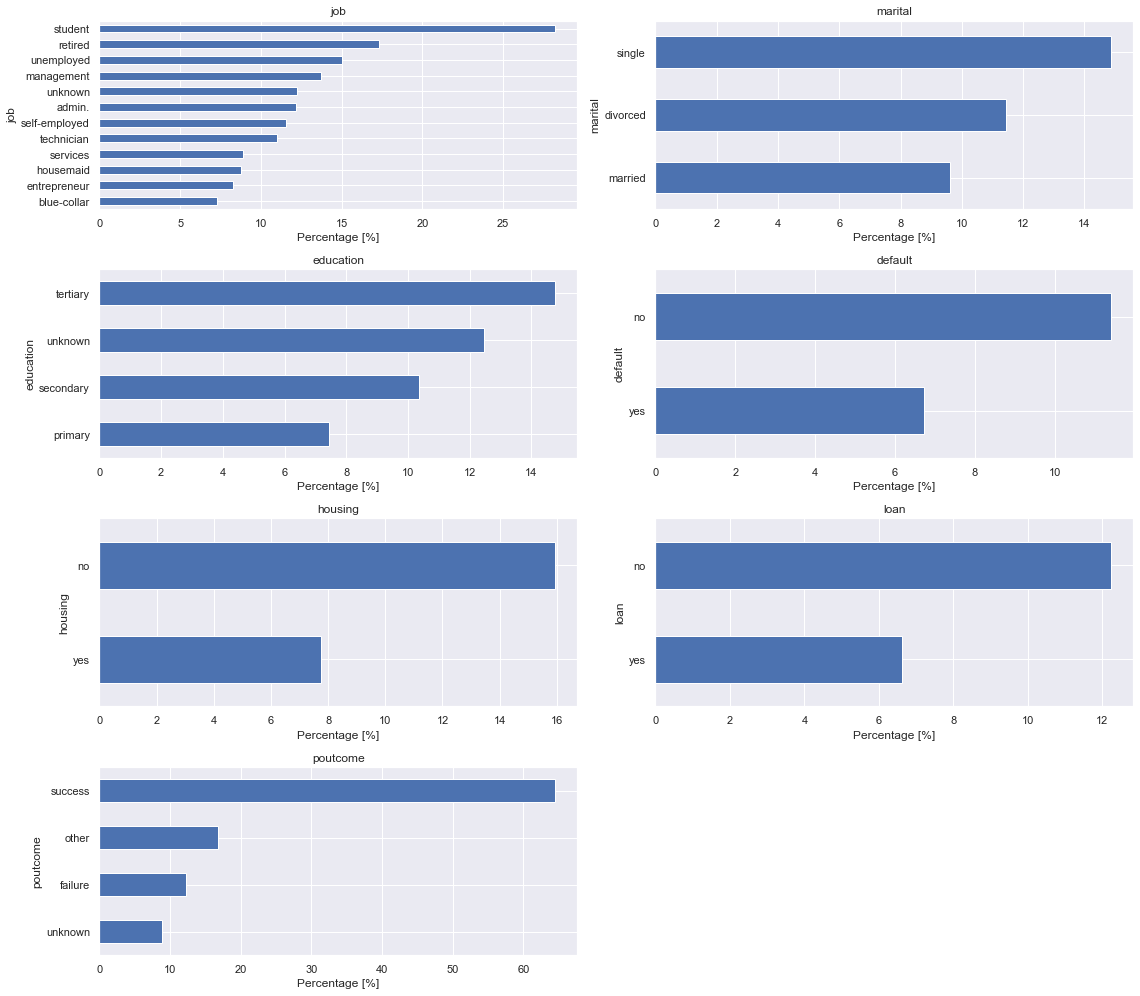

In [642]:
n = len(categorical_features)  # length of categorical_features
i=1
plt.figure(figsize=(16,14))
for feature in bank_3[categorical_features]:   # iterating through the categorical_features
    plt.subplot(round(n/2),round(n/3), i)     # ploting subplots
    bank_3.groupby([feature])['y_dummy'].mean().multiply(100).sort_values(ascending=True).plot.barh() # horizontal bar plot between feature and tearget (y) feature
    plt.xlabel('Percentage [%]') # text x label
    plt.title(feature)    
    i+=1
    plt.tight_layout();

### Conclusion

* ‘Student’ and ‘retired’ have the highest percentage of subscriptions (>16%) whereas ‘blue-collar’ and ‘services’ have the lowest.
* 'tertiary’ people have the highest percentage of subscriptions (>15%) whereas 'Primary' have the lowest.
* People with credit in default did not subscribed to term deposit.
* People with hosing loan most of them did not subscribe to term deposit.
* More than 60% of the people previously contacted to other campaigns subscribed to term deposit.